In [7]:
## Import relevant libraries
import sys
sys.path.append('../../activedrops')

## Including ourselves
import quadrop as qd
qd.set_plotting_style()

Ok so let's first define our data path, conditions and subconditions. This step is essential to start the analysis.

In [8]:
# data info
data_path = "../../data/kif3_phases_piv/"
conditions = ["DNA40nM_MT20uM", "DNA60nM_MT20uM", "DNA80nM_MT20uM"]
subconditions = ["Pos0", "Pos1", "Pos2"]

# frame info
min_frame = 0
max_frame = 999
skip_frames=8
frame_rate=120
time_intervals = [3, 3, 3]

# channel info
channel = "gfp"
vmax = 1


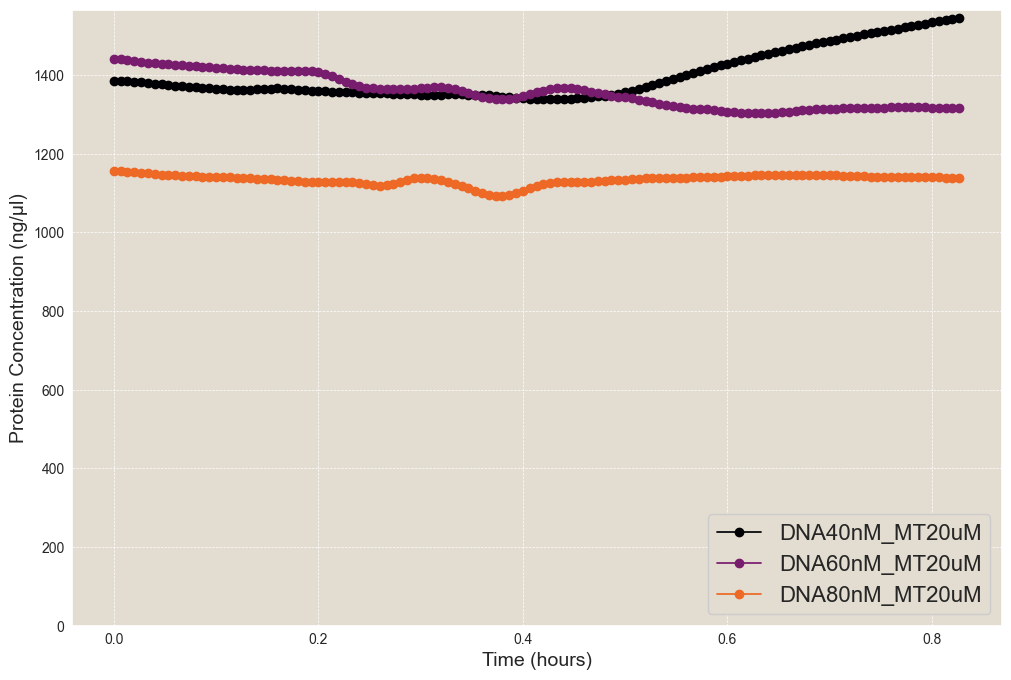

In [9]:
# Call the function with the updated parameters
qd.plot_fluorescence(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel=channel,
    time_intervals=time_intervals,  
    min_frame=min_frame,
    max_frame=max_frame,
    skip_frames=skip_frames,
    line_slope=0.00042, 
    line_intercept=0.00159+0.00095,
    log_scale=False,  # Set log_scale to True
    timescale="h",
    averaged=True
)

In [ ]:
# Call the function with the updated parameters
qd.plot_average_fluorescence_vs_time(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="gfp",
    time_intervals=time_intervals,  
    min_frame=min_frame,
    max_frame=max_frame,
    skip_frames=skip_frames,
    log_scale=False,  # Set log_scale to True
    timescale="min"
)


In [ ]:
qd.single_fluorescence_movies(data_path, conditions, subconditions, channel, time_intervals, min_frame, max_frame, vmax, skip_frames, frame_rate)

In [ ]:
qd.grid_heatmaps(data_path, conditions, subconditions, "gfp", frame_rate=frame_rate)


Now let's go to the PIV section

In [10]:
# frame info
min_frame = 0
max_frame = 999
skip_frames=8
frame_rate=120
time_intervals = [3, 3, 3]

qd.convert_images(data_path, conditions, subconditions, max_frame=max_frame, skip_frames=skip_frames)

In [11]:
v = 2E-6
velocity_limits = (0, v)
other_limits = (-0.0005, 0.0005)


# velocity_limits = (None, None)
# other_limits = (None, None)


feature_limits = {
    'u [m/s]': (-v, v), 
    'v [m/s]': (-v, v), 
    'data type [-]': (None, None),
    'velocity magnitude [m/s]': velocity_limits,
    'vorticity [1/s]': other_limits,
    'divergence [1/s]': other_limits,
    'dcev [1]': (0, 250),
    'shear [1/s]': other_limits,
    'strain [1/s]': other_limits,
    'vector direction [degrees]': (-180, 180),
}


In [12]:
qd.process_piv_data(
    data_path=data_path, 
    conditions=conditions, 
    subconditions=subconditions, 
    feature_limits=feature_limits,
    time_intervals=time_intervals,
    min_frame=min_frame, 
    max_frame=max_frame,
    skip_frames=1, 
    plot_autocorrelation=True, 
    frame_rate=frame_rate, 
    heatmaps=True
)

In [13]:
# Usage example
features_pca = [
    "vorticity [1/s]_mean",
    "velocity magnitude [um/s]",
    "divergence [1/s]_mean",
    "shear [1/s]_mean",
    "strain [1/s]_mean",
    "correlation length [um]",
    "power [W]_mean",
    "work [J]",
]

qd.plot_PIV_features(data_path, conditions, subconditions, features_pca, time_intervals, min_frame=min_frame, max_frame=max_frame)

In [ ]:
qd.plot_PIV_features(data_path, conditions[:1], subconditions, features_pca, time_intervals, min_frame=min_frame, max_frame=max_frame)

qd.plot_PIV_features(data_path, conditions[1:2], subconditions, features_pca, time_intervals, min_frame=min_frame, max_frame=max_frame)

qd.plot_PIV_features(data_path, conditions[2:3], subconditions, features_pca, time_intervals, min_frame=min_frame, max_frame=max_frame)